### Group Members for COMP 562 Final Project
POC : Li Hui Cham (lhcham@unc.edu)

PID Member 1 : 730737170

PID Member 2 : 730473608

PID Member 3 : 730514615

PID Member 4 : 730715718

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/562/final-project

!ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1Y_3A807KtltC6O2UedSY2htp2SlXQH-M/562/final-project
 562-final.ipynb  'Final Report.gdoc'   project.pdf   Top_Highest_Openings.csv


### Import Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

data = pd.read_csv("Top_Highest_Openings.csv")
data.head()

,Release,Opening,Total Gross,% of Total,Theaters,Average,Date,Distributor
0,Avengers: Endgame,357115007,858373000,41.6,4662,76601,26-04-2019,Walt Disney Studios Motion Pictures
1,Spider-Man: No Way Home,260138569,804793477,32.3,4336,59995,17-12-2021,Sony Pictures Releasing
2,Avengers: Infinity War,257698183,678815482,38.0,4474,57599,27-04-2018,Walt Disney Studios Motion Pictures
3,Star Wars: Episode VII - The Force Awakens,247966675,936662225,26.5,4134,59982,18-12-2015,Walt Disney Studios Motion Pictures
4,Star Wars: Episode VIII - The Last Jedi,220009584,620181382,35.5,4232,51987,15-12-2017,Walt Disney Studios Motion Pictures


In [ ]:
data.isnull().sum()

Release        0
Opening        0
Total Gross    0
% of Total     0
Theaters       0
Average        0
Date           0
Distributor    0
dtype: int64

In [ ]:
data.shape

(1000, 8)

In [ ]:
print(data.dtypes)

Release         object
Opening          int64
Total Gross      int64
% of Total     float64
Theaters         int64
Average          int64
Date            object
Distributor     object
dtype: object


In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')

print(data.dtypes)

Release        category
Opening           int64
Total Gross       int64
% of Total      float64
Theaters          int64
Average           int64
Date           category
Distributor    category
dtype: object


## Exploratory Data Analysis (EDA)

In [ ]:
distributor_counts = data['Distributor'].value_counts()
distributor_counts

Distributor
Warner Bros.                           171
Universal Pictures                     156
Walt Disney Studios Motion Pictures    147
Twentieth Century Fox                  127
Paramount Pictures                     108
Sony Pictures Releasing                106
Lionsgate Films                         43
DreamWorks                              22
Screen Gems                             19
New Line Cinema                         19
DreamWorks Distribution                 14
Metro-Goldwyn-Mayer                     11
Revolution Studios                       8
Summit Entertainment                     6
Dimension Films                          5
TriStar Pictures                         5
Columbia Pictures                        5
-                                        4
Miramax                                  4
20th Century Studios                     3
The Weinstein Company                    3
Focus Features                           3
Relativity Media                         3

In [ ]:
data['Distributor'] = data['Distributor'].apply(lambda x: 'Others' if data['Distributor'].value_counts()[x] < 100 else x)
distributor_counts = data['Distributor'].value_counts()
distributor_counts

Distributor
Others                                 185
Warner Bros.                           171
Universal Pictures                     156
Walt Disney Studios Motion Pictures    147
Twentieth Century Fox                  127
Paramount Pictures                     108
Sony Pictures Releasing                106
Name: count, dtype: int64

<ipython-input-9-24e41ba17b61>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = distributor_counts.index, y = distributor_counts.values, palette = 'Set2')


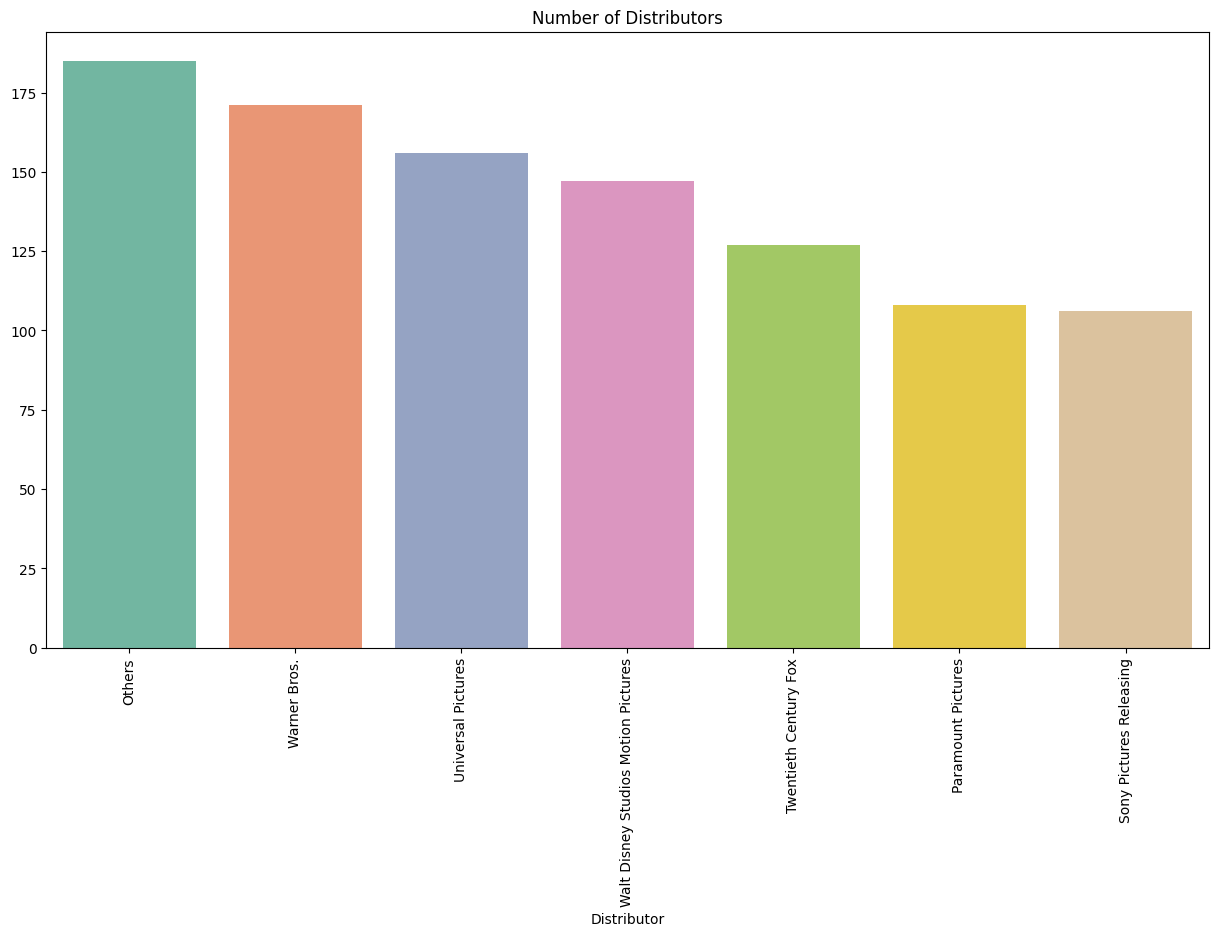

In [ ]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation = 90)
sns.barplot(x = distributor_counts.index, y = distributor_counts.values, palette = 'Set2')
plt.title('Number of Distributors')
plt.show()


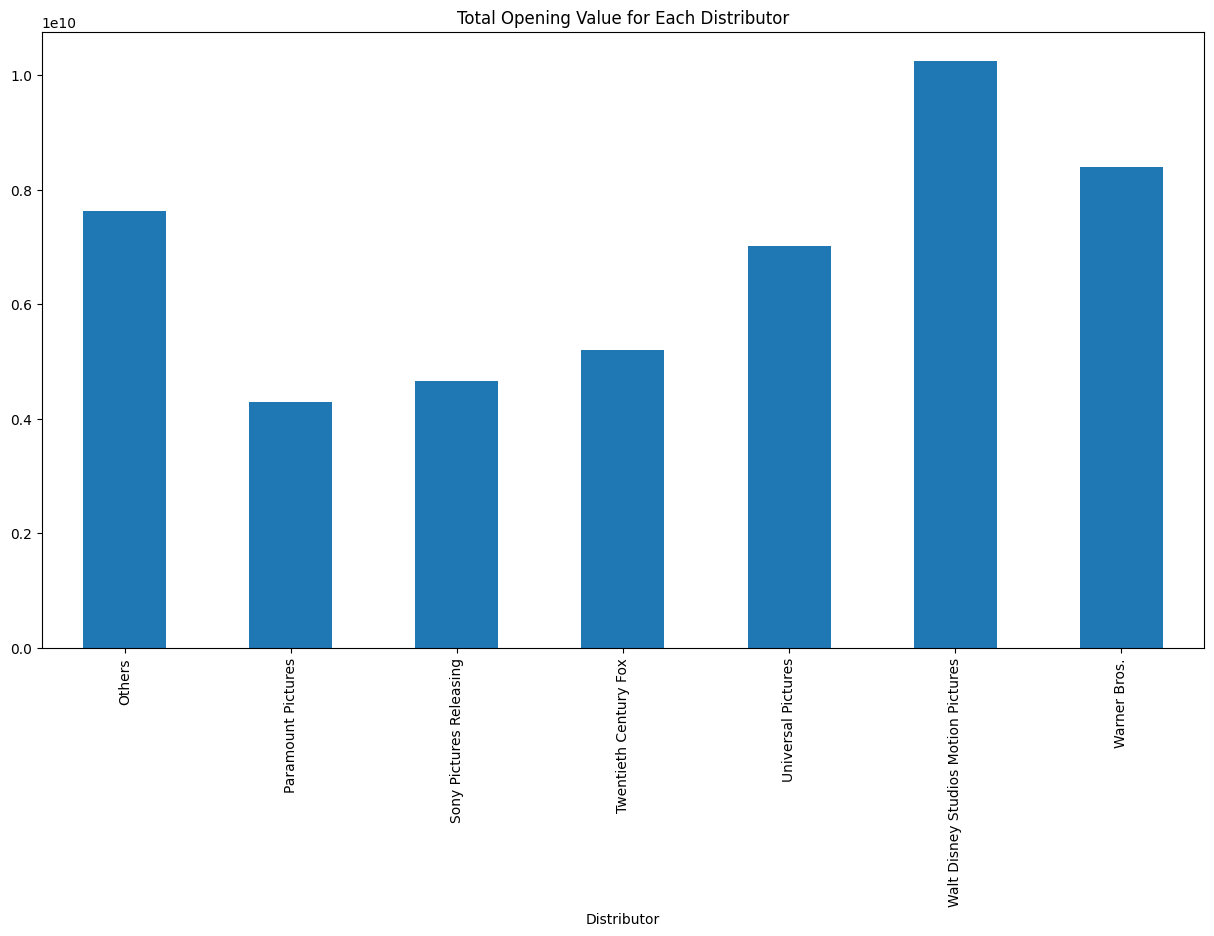

Distributor
Others                                  7619351355
Paramount Pictures                      4282768315
Sony Pictures Releasing                 4660660279
Twentieth Century Fox                   5193879164
Universal Pictures                      7023328783
Walt Disney Studios Motion Pictures    10247279064
Warner Bros.                            8386991877
Name: Opening, dtype: int64

In [ ]:
distributor_openings = data.groupby('Distributor')['Opening'].sum()
distributor_openings.plot(kind='bar', figsize=(15, 8))
plt.xticks(rotation=90)
plt.title('Total Opening Value for Each Distributor')
plt.show()

distributor_openings

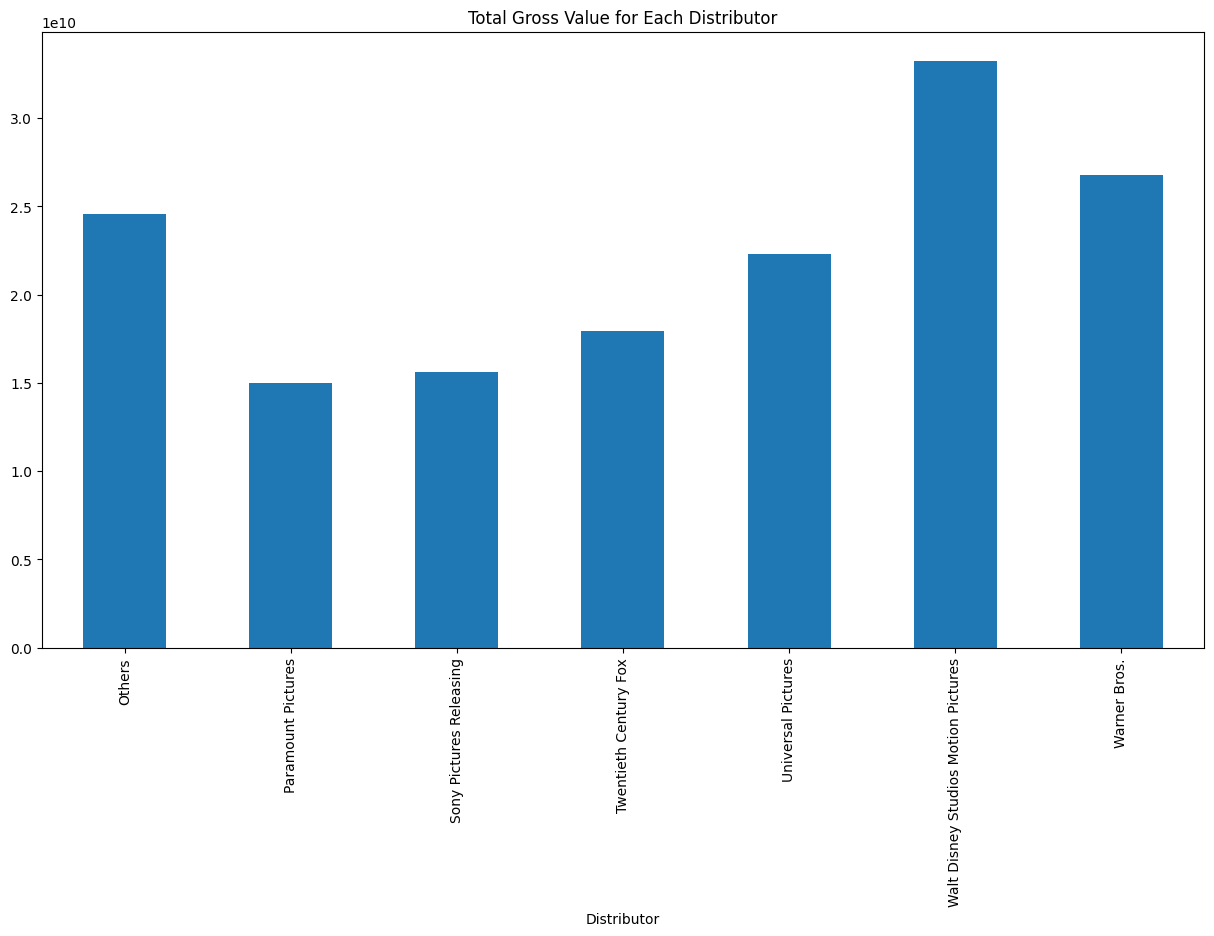

Distributor
Others                                 24566195533
Paramount Pictures                     15010407571
Sony Pictures Releasing                15637301572
Twentieth Century Fox                  17963092635
Universal Pictures                     22288645654
Walt Disney Studios Motion Pictures    33238284215
Warner Bros.                           26796622450
Name: Total Gross, dtype: int64

In [ ]:
distributor_gross = data.groupby('Distributor')['Total Gross'].sum()
distributor_gross.plot(kind='bar', figsize=(15, 8))
plt.xticks(rotation=90)
plt.title('Total Gross Value for Each Distributor')
plt.show()

distributor_gross

In [ ]:
data.describe()

,Opening,Total Gross,% of Total,Theaters,Average
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,4.741426e+07,1.555005e+08,32.219800,3428.649000,13364.709000
std,3.533072e+07,1.117642e+08,9.132172,599.952255,7902.117437
min,2.131262e+07,3.388968e+07,4.800000,683.000000,5257.000000
25%,2.623010e+07,8.451913e+07,26.075000,3055.500000,8467.500000
50%,3.470837e+07,1.206276e+08,31.800000,3461.000000,10909.500000
75%,5.442927e+07,1.817126e+08,37.900000,3875.250000,14881.250000
max,3.571150e+08,9.366622e+08,64.300000,4735.000000,76601.000000


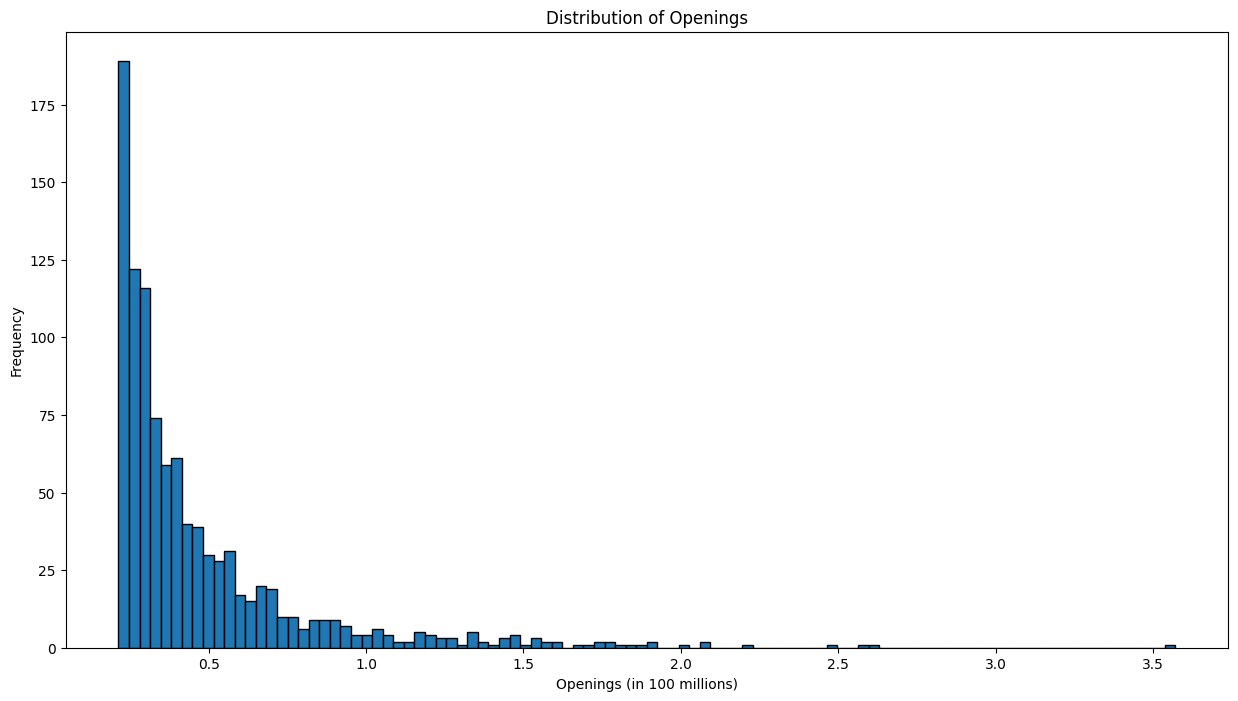

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(data['Opening'] / 1e8, bins=100, edgecolor='black')
plt.xlabel('Openings (in 100 millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Openings')
plt.show()


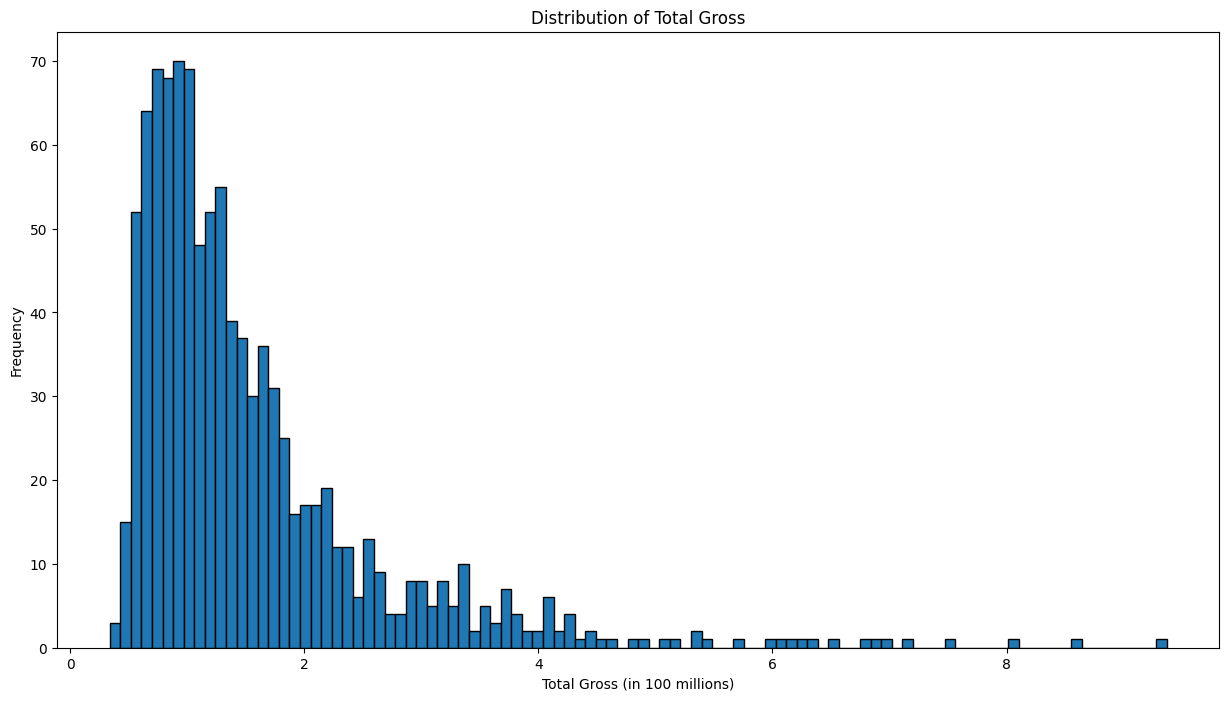

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(data['Total Gross'] / 1e8, bins=100, edgecolor='black')
plt.xlabel('Total Gross (in 100 millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Gross')
plt.show()


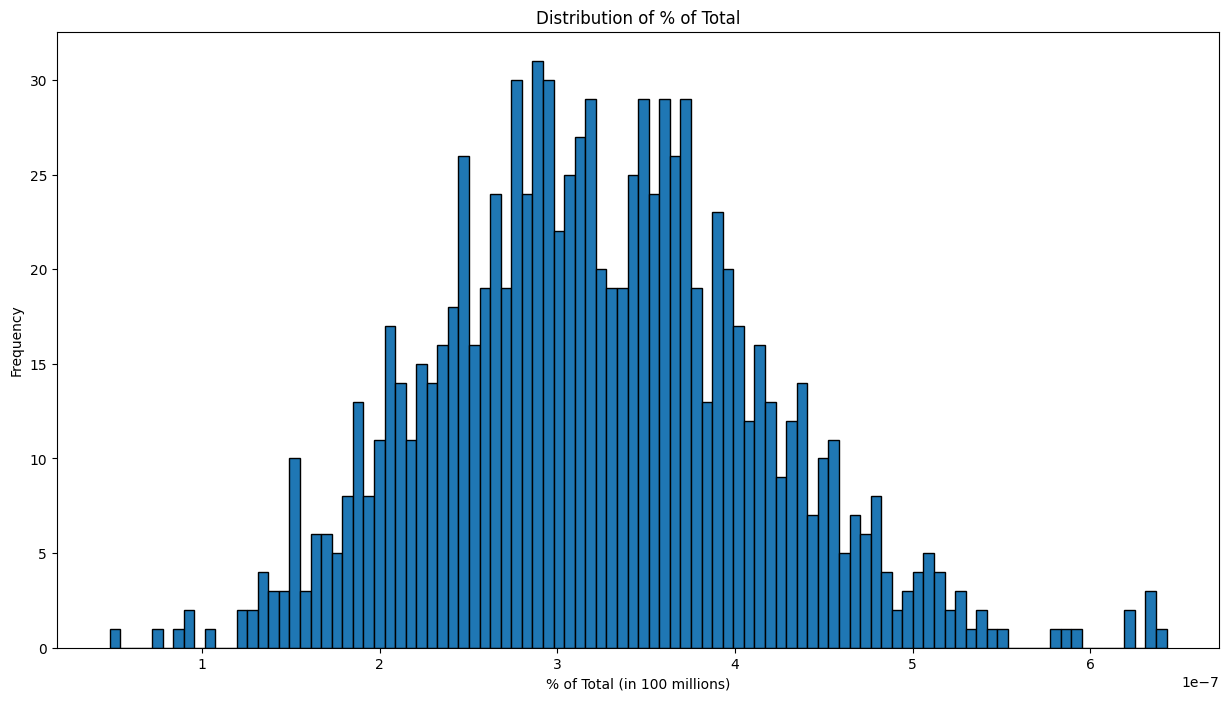

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(data['% of Total'] / 1e8, bins=100, edgecolor='black')
plt.xlabel('% of Total (in 100 millions)')
plt.ylabel('Frequency')
plt.title('Distribution of % of Total')
plt.show()

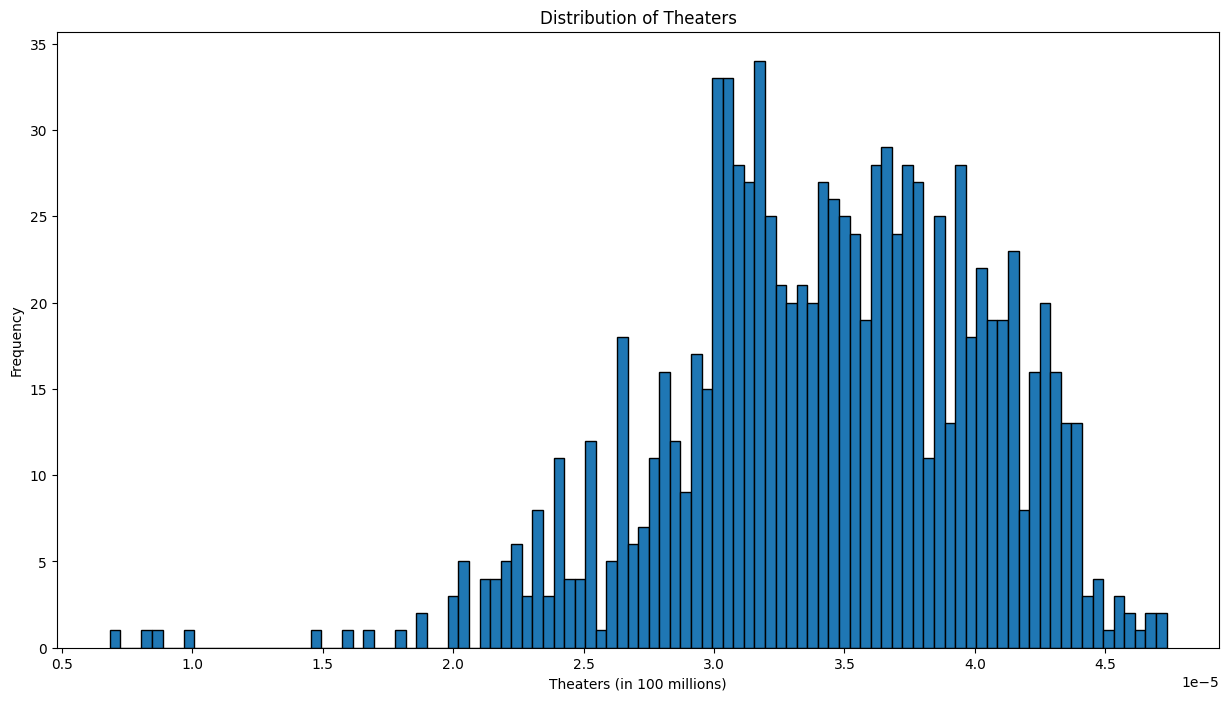

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(data['Theaters'] / 1e8, bins=100, edgecolor='black')
plt.xlabel('Theaters (in 100 millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Theaters')
plt.show()

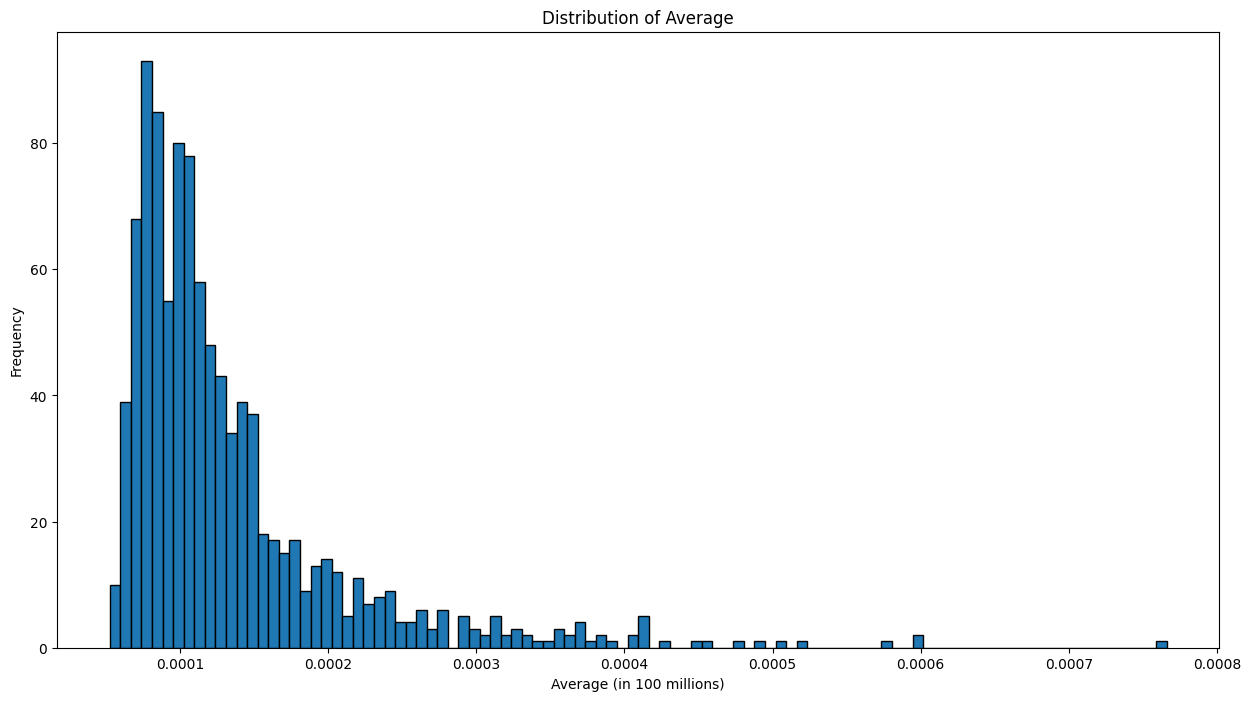

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(data['Average'] / 1e8, bins=100, edgecolor='black')
plt.xlabel('Average (in 100 millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Average')
plt.show()

In [ ]:
data[['Day', 'Month', 'Year']] = data['Date'].str.split('-', n=2, expand=True)
data.head()

,Release,Opening,Total Gross,% of Total,Theaters,Average,Date,Distributor,Day,Month,Year
0,Avengers: Endgame,357115007,858373000,41.6,4662,76601,26-04-2019,Walt Disney Studios Motion Pictures,26,04,2019
1,Spider-Man: No Way Home,260138569,804793477,32.3,4336,59995,17-12-2021,Sony Pictures Releasing,17,12,2021
2,Avengers: Infinity War,257698183,678815482,38.0,4474,57599,27-04-2018,Walt Disney Studios Motion Pictures,27,04,2018
3,Star Wars: Episode VII - The Force Awakens,247966675,936662225,26.5,4134,59982,18-12-2015,Walt Disney Studios Motion Pictures,18,12,2015
4,Star Wars: Episode VIII - The Last Jedi,220009584,620181382,35.5,4232,51987,15-12-2017,Walt Disney Studios Motion Pictures,15,12,2017


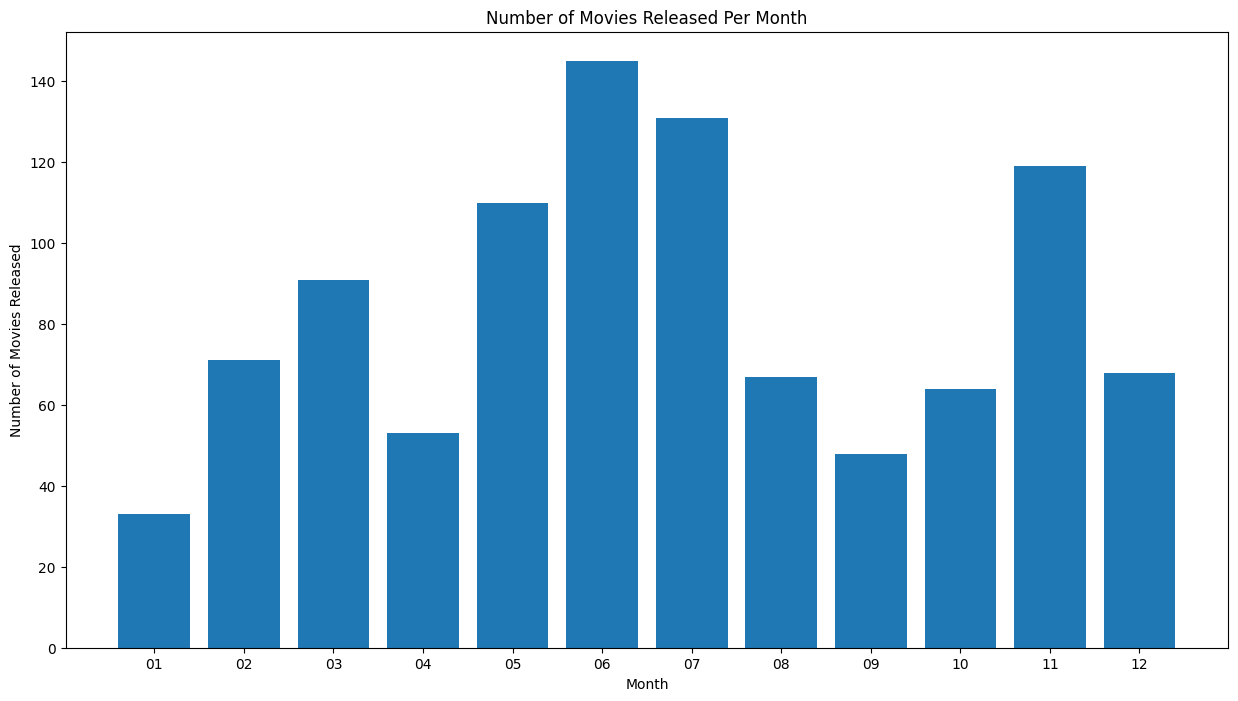

In [ ]:
month_counts = data['Month'].value_counts().sort_index(ascending=True)

plt.figure(figsize=(15, 8))
plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Per Month')
plt.xticks(rotation=0)
plt.show()


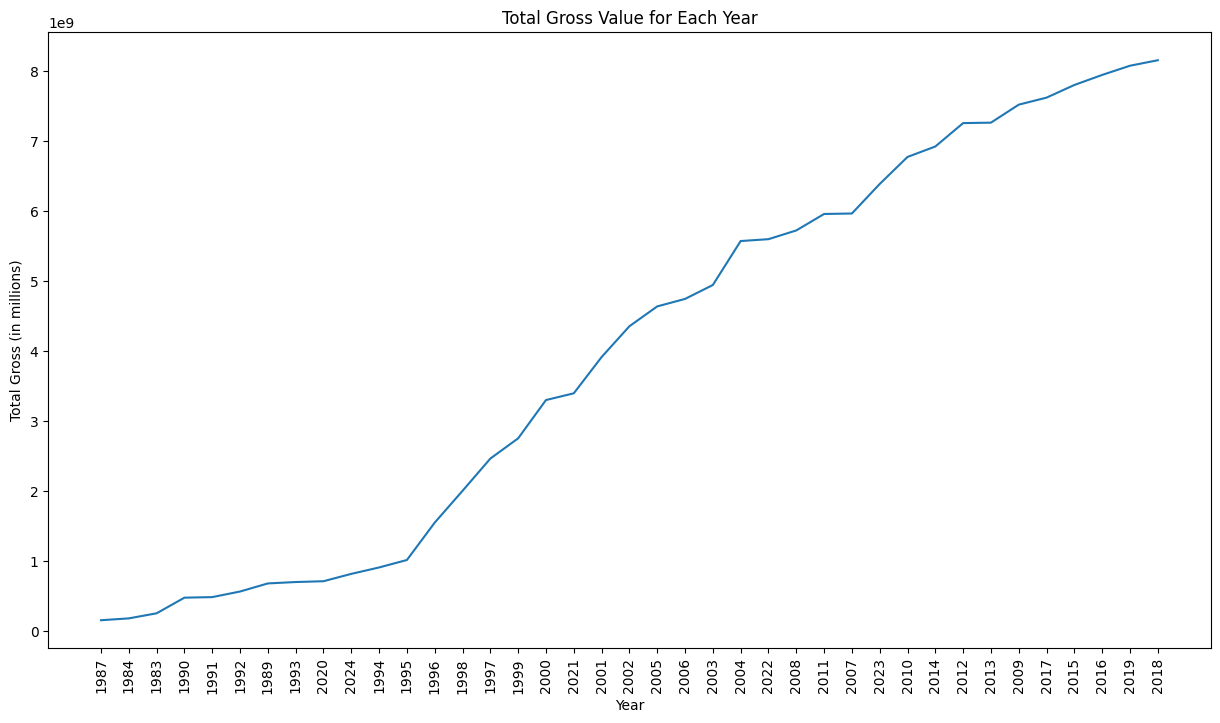

In [ ]:
grouped_data = data.groupby('Year')['Total Gross'].sum()

grouped_data = grouped_data.sort_values(ascending=True)

plt.figure(figsize=(15, 8))
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Year')
plt.ylabel('Total Gross (in millions)')
plt.title('Total Gross Value for Each Year')
plt.xticks(rotation=90)
plt.show()


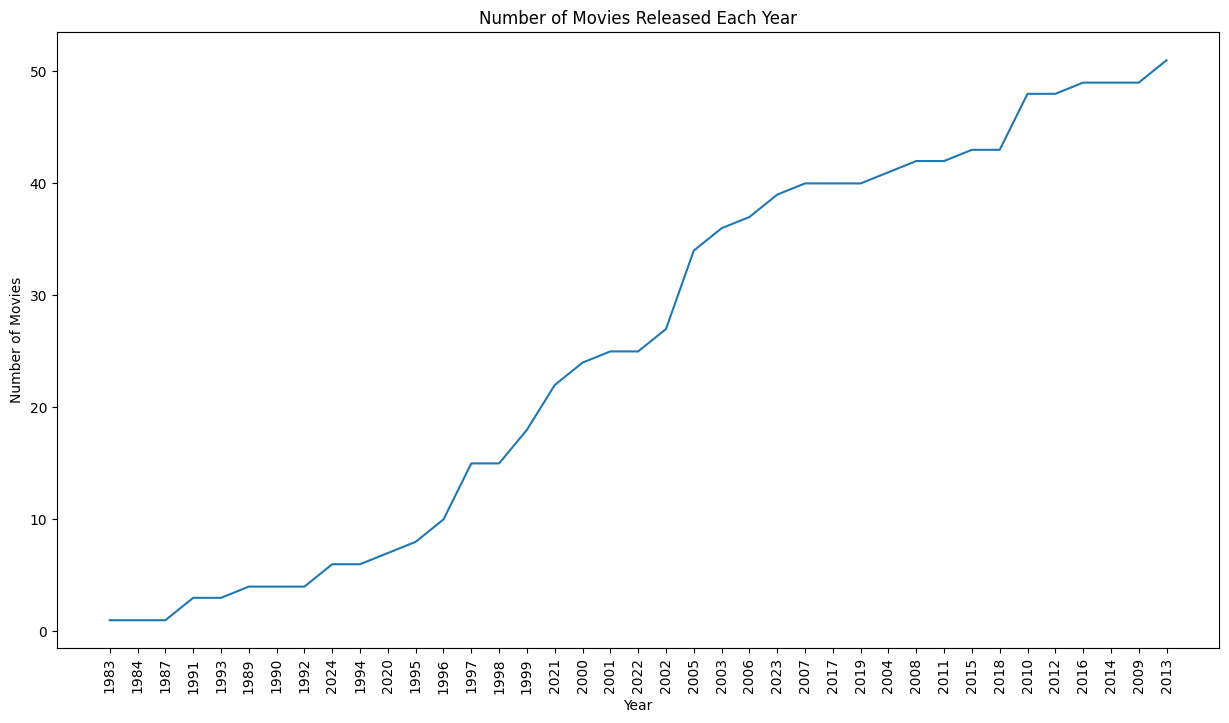

In [ ]:
grouped_data = data.groupby('Year').size()

grouped_data = grouped_data.sort_values(ascending=True)

plt.figure(figsize=(15, 8))
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.show()


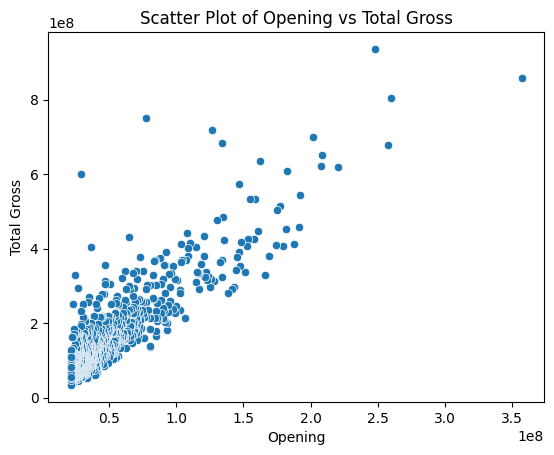

In [ ]:
sns.scatterplot(x = data['Opening'], y = data['Total Gross'])
plt.xlabel('Opening')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Opening vs Total Gross')
plt.show()


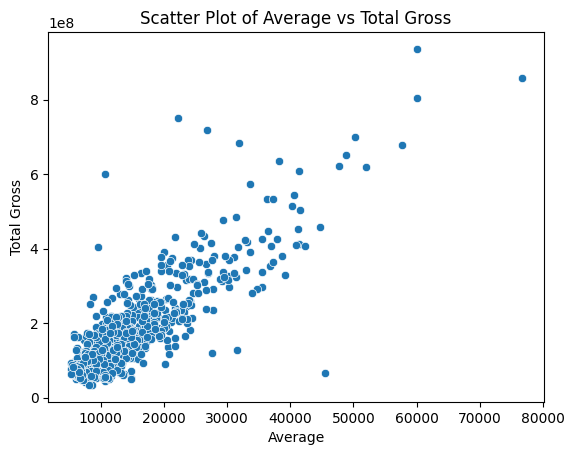

In [ ]:
sns.scatterplot(x = data['Average'], y = data['Total Gross'])
plt.xlabel('Average')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Average vs Total Gross')
plt.show()


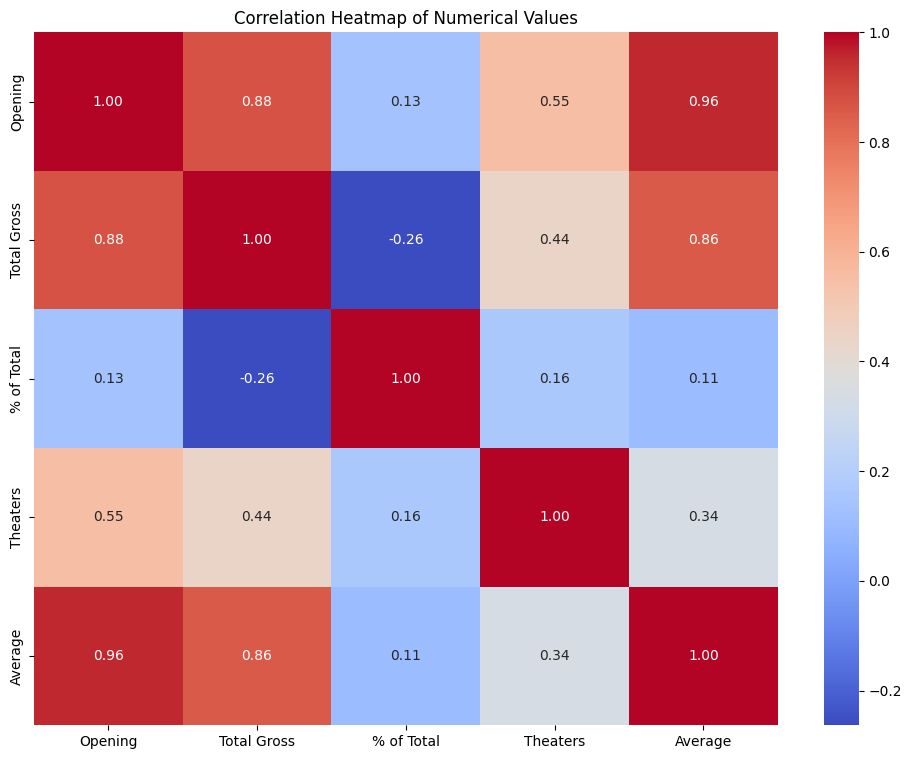

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Values')
plt.show()


ML part

In [ ]:
from sklearn.model_selection import train_test_split


import pandas as pd

# Read the CSV file
data = pd.read_csv("Top_Highest_Openings.csv")


# Split the 'Date' column into 'Day', 'Month', and 'Year'
data[['Day', 'Month', 'Year']] = data['Date'].str.split('-', n=2, expand=True)

# Convert the columns to numerical data types
data['Day'] = pd.to_numeric(data['Day'])
data['Month'] = pd.to_numeric(data['Month'])
data['Year'] = pd.to_numeric(data['Year'])

# Optionally, you can drop the original 'Date' column if it's no longer needed
# Now, all data in 'Day', 'Month', and 'Year' columns are numerical


#data['Date'] = (data['Date'] - min_date).dt.days
X = data.drop(columns=['Total Gross', '% of Total', 'Release', 'Distributor', 'Date'])
y = data['Total Gross']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(y_test.tolist().index(max(y_test)))

X_train shape: (800, 6)
X_test shape: (200, 6)
y_train shape: (800,)
y_test shape: (200,)
157


352997044.4368377
Mean Squared Error: 2.21316 \times 10^{ 15 }


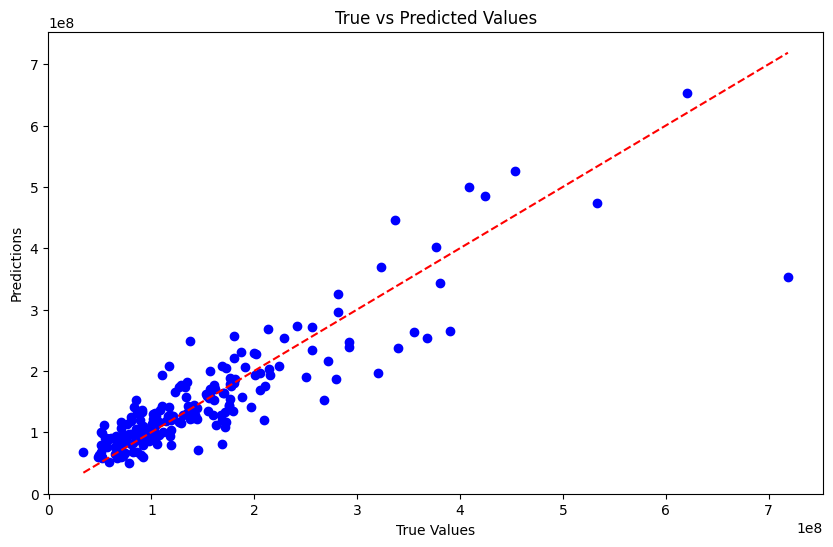

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred[157])

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse *10**-math.floor(math.log10(mse)), 5), "\\times 10^{", math.floor(math.log10(mse)), "}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.savefig("LM.png")
plt.show()



In [ ]:


model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}, {coef}")

correlation_coefficients = X.corrwith(y)

correlation_df = pd.DataFrame({'Correlation Coefficient': correlation_coefficients})
print(correlation_df)

Intercept: 3666635681.512526
Coefficients:
Opening, 1.8764813694969302
Theaters, 18840.659980333803
Average, 3826.7271874296566
Day, 389269.56417618436
Month, 3465958.6599470438
Year, -1863223.7295686738
          Correlation Coefficient
Opening                  0.875158
Theaters                 0.441185
Average                  0.856160
Day                     -0.026206
Month                    0.103793
Year                     0.096635


Mean Squared Error: 2.21316 \times 10^{ 15 }


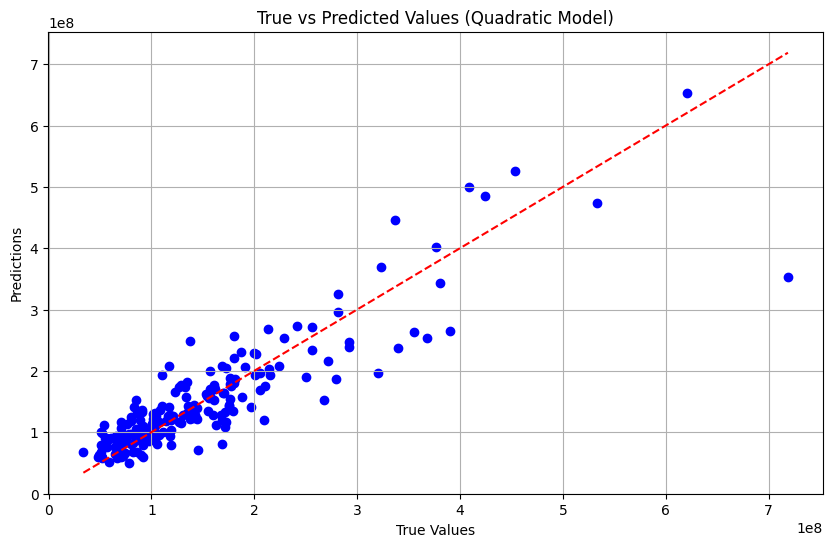

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degree = 1

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse *10**-math.floor(math.log10(mse)), 5), "\\times 10^{", math.floor(math.log10(mse)), "}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (Quadratic Model)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.52455e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.91507e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.78504e-50): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. U

[2211484448643446.5, 2236606035264604.8, 9734222574992276.0, 3053785835943017.5, 2195138898224850.0, 6098147239844492.0, 7030016078314922.0, 7714787311145276.0, 8401550023755057.0, 8837310101769110.0]


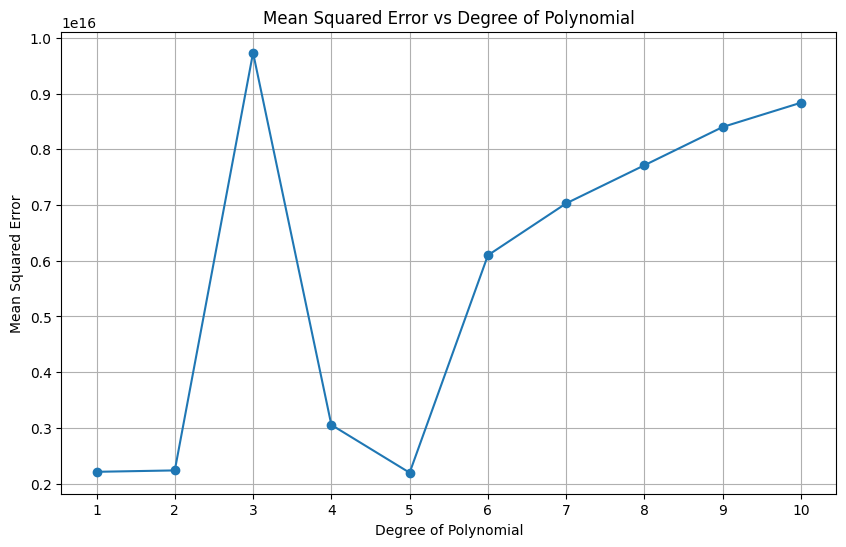

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees = range(1, 11)

mse_values = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = Ridge(alpha= 1e2)#LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values, marker='o', linestyle='-')
print(mse_values)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Degree of Polynomial')
plt.xticks(degrees)
plt.grid(True)
plt.show()


Mean Squared Error: 2.19631 \times 10^{ 15 }


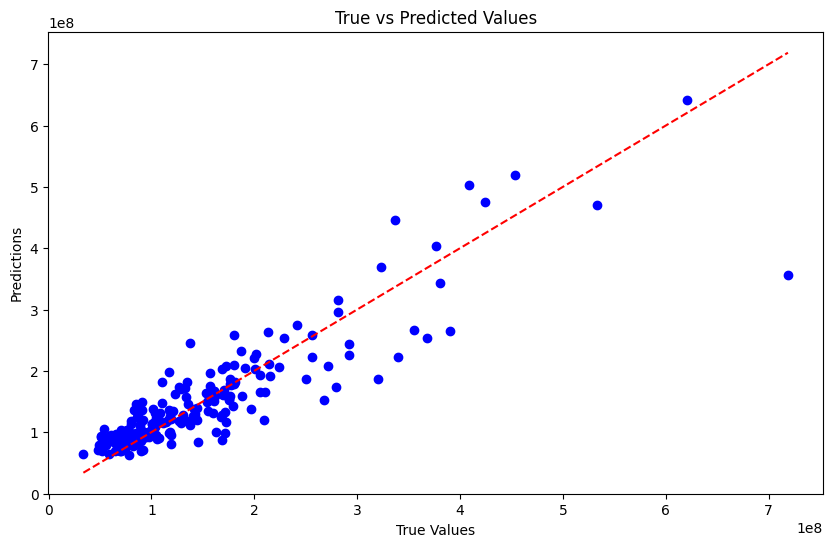

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha= 1e4)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error:", round(mse *10**-math.floor(math.log10(mse)), 5), "\\times 10^{", math.floor(math.log10(mse)), "}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.savefig("RR.png")
plt.show()


Mean Squared Error (Neural Network): 2904975380671108.5


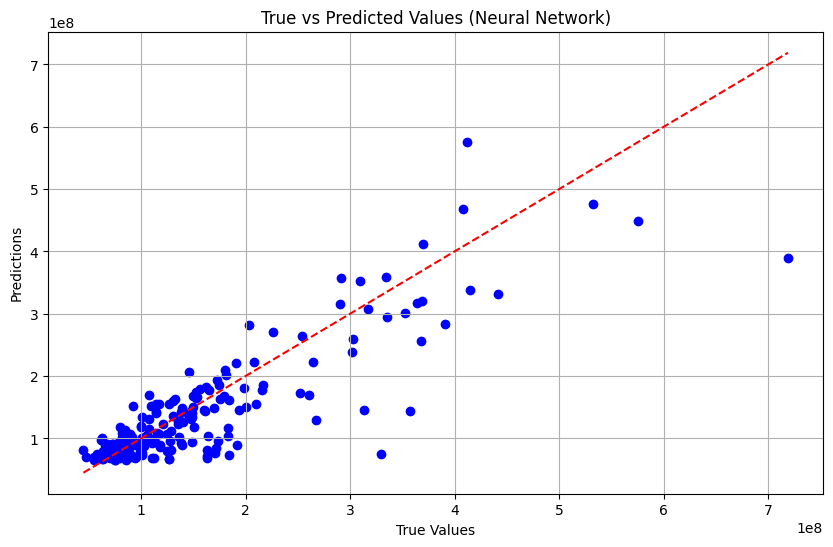

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), max_iter=500000)  # 2 hidden layers with 10 nodes each
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


Epoch 1/60
1/1 - 1s - loss: 1.3711 - val_loss: 0.5142 - 567ms/epoch - 567ms/step
Epoch 2/60
1/1 - 0s - loss: 0.6752 - val_loss: 0.2346 - 29ms/epoch - 29ms/step
Epoch 3/60
1/1 - 0s - loss: 0.3289 - val_loss: 0.1823 - 28ms/epoch - 28ms/step
Epoch 4/60
1/1 - 0s - loss: 0.2576 - val_loss: 0.2566 - 28ms/epoch - 28ms/step
Epoch 5/60
1/1 - 0s - loss: 0.3303 - val_loss: 0.3511 - 26ms/epoch - 26ms/step
Epoch 6/60
1/1 - 0s - loss: 0.4174 - val_loss: 0.4082 - 30ms/epoch - 30ms/step
Epoch 7/60
1/1 - 0s - loss: 0.4573 - val_loss: 0.4172 - 27ms/epoch - 27ms/step
Epoch 8/60
1/1 - 0s - loss: 0.4470 - val_loss: 0.3882 - 30ms/epoch - 30ms/step
Epoch 9/60
1/1 - 0s - loss: 0.4042 - val_loss: 0.3387 - 28ms/epoch - 28ms/step
Epoch 10/60
1/1 - 0s - loss: 0.3490 - val_loss: 0.2852 - 26ms/epoch - 26ms/step
Epoch 11/60
1/1 - 0s - loss: 0.2972 - val_loss: 0.2391 - 31ms/epoch - 31ms/step
Epoch 12/60
1/1 - 0s - loss: 0.2587 - val_loss: 0.2063 - 29ms/epoch - 29ms/step
Epoch 13/60
1/1 - 0s - loss: 0.2370 - val_loss:

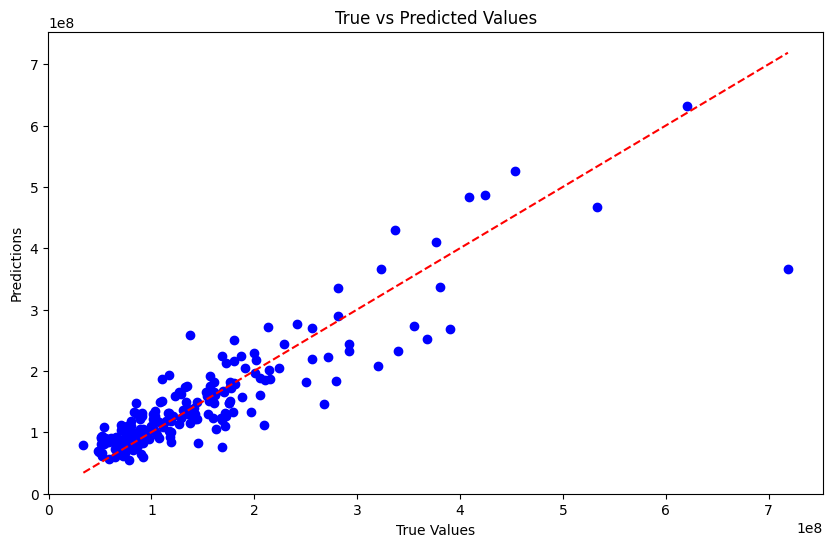

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train_normalized = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_normalized = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

model = Sequential()
model.add(Dense(200, input_dim=X_train_normalized.shape[1], activation='elu', use_bias=True))
model.add(Dense(200, activation='elu', use_bias=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_normalized, y_train_normalized, epochs=60, batch_size=800, validation_data=(X_test_normalized, y_test_normalized), verbose=2)

y_pred_normalized = model.predict(X_test_normalized)

y_pred = scaler_y.inverse_transform(y_pred_normalized).ravel()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse *10**-math.floor(math.log10(mse)), 5), "\\times 10^{", math.floor(math.log10(mse)), "}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.savefig("NN.png")
plt.show()


Mean Squared Error: 2.41405 \times 10^{ 15 }


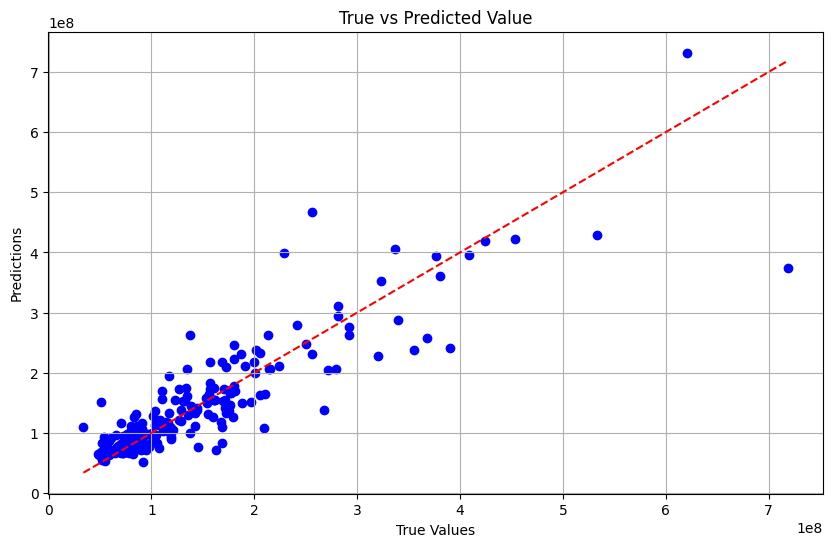

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gbm)
print("Mean Squared Error:", round(mse *10**-math.floor(math.log10(mse)), 5), "\\times 10^{", math.floor(math.log10(mse)), "}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Value')
plt.grid(True)
plt.show()


Mean Squared Error: 2.17689 \times 10^{ 15 }


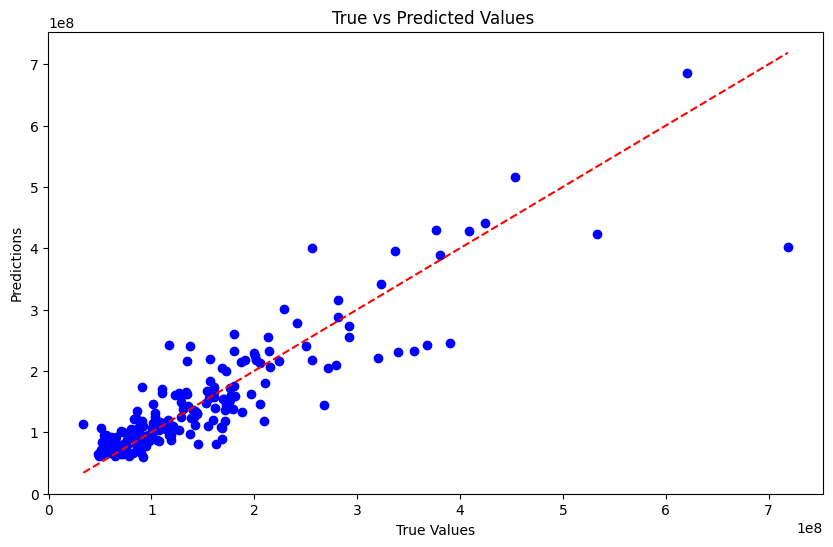

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", round(mse *10**-math.floor(math.log10(mse)), 5), "\\times 10^{", math.floor(math.log10(mse)), "}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values ')
plt.show()


Mean Squared Error: 2.73705 \times 10^{ 15 }


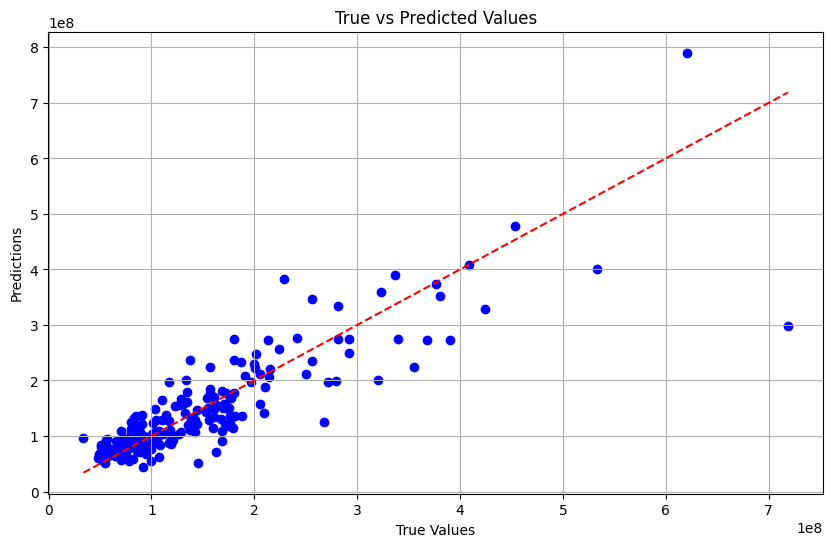

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error:", round(mse *10**-math.floor(math.log10(mse)), 5), "\\times 10^{", math.floor(math.log10(mse)), "}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.show()
